In [ ]:
!pip install torch torchvision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm  # For progress bar

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Load your dataset (update the path to your actual dataset)
full_dataset = datasets.ImageFolder(root='/content/drive/My Drive/Annotated_dal_naan/images', transform=transform)

# Ensure dataset is not empty
if len(full_dataset) == 0:
    raise ValueError("The dataset is empty. Please check the path and contents.")

# Split into training and validation datasets
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Initialize MobileNet model
model = models.mobilenet_v2(weights=None)  # Using 'weights=None' to load the model without pretrained weights

In [ ]:
# Check number of images and class distribution
print(f"Total images in dataset: {len(full_dataset)}")

Total images in dataset: 100


In [ ]:
# Replace the final layer to fit your number of classes
num_classes = len(full_dataset.classes)  # Get the number of classes from the dataset
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Training loop with validation
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    # Training phase
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)  # Move labels to the device

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_loss:.4f}')

    # Validation phase
    model.eval()
    val_running_loss = 0.0
    correct = 0
    total = 0

    all_labels = []  # Initialize here
    all_preds = []   # Initialize here

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc='Validating'):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Collect predictions and true labels
            all_labels.extend(labels.cpu().numpy())  # Convert to numpy and add to list
            all_preds.extend(predicted.cpu().numpy())  # Convert to numpy and add to list

    val_avg_loss = val_running_loss / len(val_loader)
    val_accuracy = correct / total * 100 if total > 0 else 0
    print(f'Epoch [{epoch + 1}/{num_epochs}], Validation Loss: {val_avg_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

print("Training and validation complete.")

Epoch [1/10], Training Loss: 0.0113


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]


Epoch [1/10], Validation Loss: 2.8461, Accuracy: 40.00%
Epoch [2/10], Training Loss: 0.1560


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]


Epoch [2/10], Validation Loss: 2.9196, Accuracy: 40.00%
Epoch [3/10], Training Loss: 0.0272


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Epoch [3/10], Validation Loss: 3.0461, Accuracy: 40.00%
Epoch [4/10], Training Loss: 0.1320


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.02s/it]


Epoch [4/10], Validation Loss: 3.2369, Accuracy: 40.00%
Epoch [5/10], Training Loss: 0.0341


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]


Epoch [5/10], Validation Loss: 3.5326, Accuracy: 40.00%
Epoch [6/10], Training Loss: 0.0133


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Epoch [6/10], Validation Loss: 3.8584, Accuracy: 40.00%
Epoch [7/10], Training Loss: 0.0202


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]


Epoch [7/10], Validation Loss: 4.2520, Accuracy: 40.00%
Epoch [8/10], Training Loss: 0.0077


Validating: 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


Epoch [8/10], Validation Loss: 4.7236, Accuracy: 40.00%
Epoch [9/10], Training Loss: 0.1454


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]


Epoch [9/10], Validation Loss: 5.2776, Accuracy: 40.00%
Epoch [10/10], Training Loss: 0.0509


Validating: 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

Epoch [10/10], Validation Loss: 5.8905, Accuracy: 40.00%
Training and validation complete.


In [ ]:
# Save the model
torch.save(model.state_dict(), 'mobilenet_model.pth')

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files # Import the 'files' module from google.colab for file uploads

# Load the trained model
model = models.mobilenet_v2(weights='DEFAULT')
num_classes = len(full_dataset.classes)  # Ensure this matches the original number of classes
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
model.load_state_dict(torch.load('mobilenet_model.pth'))

<ipython-input-22-4d4e56a193c8>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('mobilenet_model.pth'))


<All keys matched successfully>

In [ ]:
# Map food classes to calories (example values, adjust as needed)
calorie_dict = {
    'dal': 200,  # calories per serving
    'naan': 250,
}

# Function to make predictions
def predict_image(image_path):
    # Open the image
    image = Image.open(image_path).convert('RGB')

    # Transform the image
    image = transform(image).unsqueeze(0)  # Add a batch dimension

    # Move image to device
    image = image.to(device)

    # Make prediction
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output.data, 1)

      # Map the predicted class index to class name
    class_index = predicted.item()
    class_name = full_dataset.classes[class_index]

    # Get calories for the predicted class
    calories = calorie_dict.get(class_name, "Unknown food item")

    return class_name, calories

Saving 00000039_resized.png to 00000039_resized.png
The predicted class is: dal
Estimated calories: 200 kcal per serving


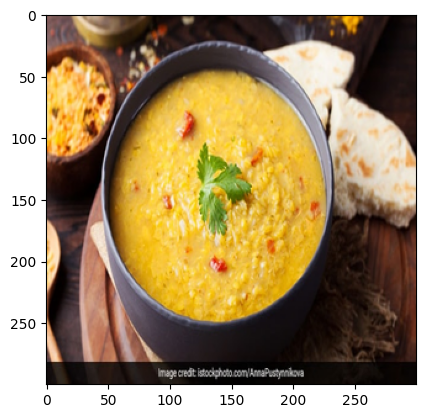

In [ ]:
# Function to upload an image
def upload_image():
  uploaded = files.upload()
  for fn in uploaded.keys():
    return fn

# Main function to run the prediction
if __name__ == "__main__":
    image_path = upload_image()
    if image_path:  # Check if a file was selected
        predicted_class, calories = predict_image(image_path)
        print(f'The predicted class is: {predicted_class}')
        print(f'Estimated calories: {calories} kcal per serving')
    else:
        print("No image selected.")

    # Display the selected image using Matplotlib (if needed)
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.show()

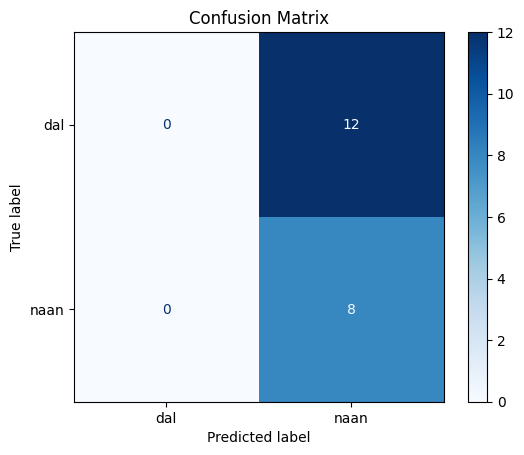

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=full_dataset.classes)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate TP, FP, FN, TN for each class
tp = np.diag(cm)  # True positives are the diagonal elements
fp = cm.sum(axis=0) - tp  # False positives are column sums minus TP
fn = cm.sum(axis=1) - tp  # False negatives are row sums minus TP
tn = cm.sum() - (fp + fn + tp)  # True negatives are the rest of the elements

# Display the metrics
for i, class_name in enumerate(full_dataset.classes):
    print(f"Class: {class_name}")
    print(f"True Positives (TP): {tp[i]}")
    print(f"False Positives (FP): {fp[i]}")
    print(f"False Negatives (FN): {fn[i]}")
    print(f"True Negatives (TN): {tn[i]}")
    print("----")

Class: dal
True Positives (TP): 0
False Positives (FP): 0
False Negatives (FN): 12
True Negatives (TN): 8
----
Class: naan
True Positives (TP): 8
False Positives (FP): 12
False Negatives (FN): 0
True Negatives (TN): 0
----


In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=full_dataset.classes))

Classification Report:
              precision    recall  f1-score   support

         dal       0.00      0.00      0.00        12
        naan       0.40      1.00      0.57         8

    accuracy                           0.40        20
   macro avg       0.20      0.50      0.29        20
weighted avg       0.16      0.40      0.23        20



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
